# Background
- 通过Unassorted list的Motif calling，发现的确有一部分点属于和TALE比较像的点, 也有一些和CTCF比较像的点，把这些点刨掉，思路是使用JASPAR的标准CTCF motif.meme和构造TALE like的motif
- 剩下的点再进行deeptools的分析


| <sample>                     |   Dep_Left |   Dep_Right |   Dep_Both |   Independent |   Unassorted |   Total |
|:-----------------------------|-----------:|------------:|-----------:|--------------:|-------------:|--------:|
| DetectSeq_ATP8-DddA11_REP-1  |          1 |          99 |          6 |            52 |          109 |     267 |
| DetectSeq_ATP8-DddA6_REP-1   |         14 |         454 |         20 |            34 |          664 |    1186 |
| DetectSeq_ATP8-DddAwt_REP-1  |          1 |           7 |          0 |             6 |           15 |      29 |
| DetectSeq_JAK2-DddA11_REP-1  |         22 |          11 |          1 |           428 |          319 |     781 |
| DetectSeq_JAK2-DddA11_REP-2  |         19 |         162 |          9 |           183 |          473 |     846 |
| DetectSeq_SIRT6-DddA11_REP-1 |         44 |          28 |          0 |           611 |         2413 |    3096 |
| DetectSeq_SIRT6-DddA11_REP-2 |        164 |          83 |          5 |           524 |         8577 |    9353 |


|    | <sample>                     | TAS-Dep_stat   | align_query_seq   |
|---:|:-----------------------------|:---------------|:------------------|
|  0 | DetectSeq_ATP8-DddA11_REP-1  | Left           | ATTAAACACAAACTAC  |
|  1 | DetectSeq_ATP8-DddA11_REP-1  | Right          | ATGGGCTTTGGT      |
|  2 | DetectSeq_ATP8-DddA6_REP-1   | Left           | ATTAAACACAAACTAC  |
|  3 | DetectSeq_ATP8-DddA6_REP-1   | Right          | ATGGGCTTTGGT      |
|  4 | DetectSeq_ATP8-DddAwt_REP-1  | Left           | ATTAAACACAAACTAC  |
|  5 | DetectSeq_ATP8-DddAwt_REP-1  | Right          | ATGGGCTTTGGT      |
|  6 | DetectSeq_JAK2-DddA11_REP-1  | Left           | CTGAAAAAGACTCTGCA |
|  7 | DetectSeq_JAK2-DddA11_REP-1  | Right          | CCATTTCTGTCATCGTA |
|  8 | DetectSeq_JAK2-DddA11_REP-2  | Left           | CTGAAAAAGACTCTGCA |
|  9 | DetectSeq_JAK2-DddA11_REP-2  | Right          | CCATTTCTGTCATCGTA |
| 10 | DetectSeq_SIRT6-DddA11_REP-1 | Left           | TACGCGGCGGGGCTGTC |
| 11 | DetectSeq_SIRT6-DddA11_REP-1 | Right          | CCGGGAGGCCGCACTTG |
| 12 | DetectSeq_SIRT6-DddA11_REP-2 | Left           | TACGCGGCGGGGCTGTC |
| 13 | DetectSeq_SIRT6-DddA11_REP-2 | Right          | CCGGGAGGCCGCACTTG |

# Before running this notebook

In [1]:
# see:
# ../art_seqinfo/TAS-DEP_for_fimo.log.sh
# unassorted_try_classification_*/meme_chip_step_by_step.sh

# Package

In [1]:
import pandas as pd
from glob import glob

# 从Unassorted信息里，整理通过MOTIF call到的TAS-Dep和CTCF index

In [2]:
ls = []
for file in sorted(list(filter(lambda x: 'ATP8' not in x, glob('../art_seqinfo/unassorted_try_classification_*/motif_scanning/fimo/seqinfo_DetectSeq_*-DddA11_REP-*_unassorted.fa/fimo.tsv')))):
    df = pd.read_csv(file, sep='\t', comment='#')
    df['file'] = file
    ls.append(df)
df = pd.concat(ls)
df

,motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence,file
0,MA0139.1,CTCF,region_index:chr16_7025792_7025803,177,195,+,24.6230,1.090000e-09,0.000219,TGGCCAGCAGATGGCGCTG,../art_seqinfo/unassorted_try_classification_C...
1,MA0139.1,CTCF,region_index:chr15_27059769_27059815,210,228,+,24.2623,1.810000e-09,0.000219,TGACCACTAGGTGGCACCA,../art_seqinfo/unassorted_try_classification_C...
2,MA0139.1,CTCF,region_index:chr22_36180456_36180481,205,223,-,23.8689,2.960000e-09,0.000237,CGACCACCAGGGGGCAGCC,../art_seqinfo/unassorted_try_classification_C...
3,MA0139.1,CTCF,region_index:chr1_221203635_221203654,207,225,-,23.4754,4.680000e-09,0.000237,CAGCCAGCAGGGGGCAGTA,../art_seqinfo/unassorted_try_classification_C...
4,MA0139.1,CTCF,region_index:chr7_25160180_25160201,205,223,-,23.3115,5.620000e-09,0.000237,TAGCCACTAGATGGCGCCA,../art_seqinfo/unassorted_try_classification_C...
...,...,...,...,...,...,...,...,...,...,...,...
348,CCGGGAGGCC,MEME-1,region_index:chr1_83845452_83845474,184,193,+,10.4321,9.810000e-05,0.880000,CTGAGAGGCC,../art_seqinfo/unassorted_try_classification_T...
349,CCGGGAGGCC,MEME-1,region_index:chr18_11857355_11857389,228,237,+,10.4321,9.810000e-05,0.880000,CTGAGAGGCC,../art_seqinfo/unassorted_try_classification_T...
350,CCGGGAGGCC,MEME-1,region_index:chr5_72525165_72525213,277,286,+,10.4321,9.810000e-05,0.880000,CTGAGAGGCC,../art_seqinfo/unassorted_try_classification_T...
351,CCGGGAGGCC,MEME-1,region_index:chrX_154457793_154457805,280,289,+,10.4321,9.810000e-05,0.880000,CTGAGAGGCC,../art_seqinfo/unassorted_try_classification_T...


In [3]:
df['query_motif'] = df['file'].str.split('/').str[2].str.split('cation_').str[-1]
df['fasta_from'] = df['file'].str.split('/').str[5].str.split('_').str[2] + '_' + df['file'].str.split('/').str[5].str.split('_').str[3]
df['region_index'] = df['sequence_name'].str.split(':').str[-1]
df

,motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence,file,query_motif,fasta_from,region_index
0,MA0139.1,CTCF,region_index:chr16_7025792_7025803,177,195,+,24.6230,1.090000e-09,0.000219,TGGCCAGCAGATGGCGCTG,../art_seqinfo/unassorted_try_classification_C...,CTCF,JAK2-DddA11_REP-1,chr16_7025792_7025803
1,MA0139.1,CTCF,region_index:chr15_27059769_27059815,210,228,+,24.2623,1.810000e-09,0.000219,TGACCACTAGGTGGCACCA,../art_seqinfo/unassorted_try_classification_C...,CTCF,JAK2-DddA11_REP-1,chr15_27059769_27059815
2,MA0139.1,CTCF,region_index:chr22_36180456_36180481,205,223,-,23.8689,2.960000e-09,0.000237,CGACCACCAGGGGGCAGCC,../art_seqinfo/unassorted_try_classification_C...,CTCF,JAK2-DddA11_REP-1,chr22_36180456_36180481
3,MA0139.1,CTCF,region_index:chr1_221203635_221203654,207,225,-,23.4754,4.680000e-09,0.000237,CAGCCAGCAGGGGGCAGTA,../art_seqinfo/unassorted_try_classification_C...,CTCF,JAK2-DddA11_REP-1,chr1_221203635_221203654
4,MA0139.1,CTCF,region_index:chr7_25160180_25160201,205,223,-,23.3115,5.620000e-09,0.000237,TAGCCACTAGATGGCGCCA,../art_seqinfo/unassorted_try_classification_C...,CTCF,JAK2-DddA11_REP-1,chr7_25160180_25160201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,CCGGGAGGCC,MEME-1,region_index:chr1_83845452_83845474,184,193,+,10.4321,9.810000e-05,0.880000,CTGAGAGGCC,../art_seqinfo/unassorted_try_classification_T...,TAS-DEP_SIRT6_RIGHT,SIRT6-DddA11_REP-2,chr1_83845452_83845474
349,CCGGGAGGCC,MEME-1,region_index:chr18_11857355_11857389,228,237,+,10.4321,9.810000e-05,0.880000,CTGAGAGGCC,../art_seqinfo/unassorted_try_classification_T...,TAS-DEP_SIRT6_RIGHT,SIRT6-DddA11_REP-2,chr18_11857355_11857389
350,CCGGGAGGCC,MEME-1,region_index:chr5_72525165_72525213,277,286,+,10.4321,9.810000e-05,0.880000,CTGAGAGGCC,../art_seqinfo/unassorted_try_classification_T...,TAS-DEP_SIRT6_RIGHT,SIRT6-DddA11_REP-2,chr5_72525165_72525213
351,CCGGGAGGCC,MEME-1,region_index:chrX_154457793_154457805,280,289,+,10.4321,9.810000e-05,0.880000,CTGAGAGGCC,../art_seqinfo/unassorted_try_classification_T...,TAS-DEP_SIRT6_RIGHT,SIRT6-DddA11_REP-2,chrX_154457793_154457805


In [4]:
df = df[['query_motif', 'fasta_from', 'region_index'
         # , 'p-value', 'q-value', 'score'
        ]].copy()
df

,query_motif,fasta_from,region_index
0,CTCF,JAK2-DddA11_REP-1,chr16_7025792_7025803
1,CTCF,JAK2-DddA11_REP-1,chr15_27059769_27059815
2,CTCF,JAK2-DddA11_REP-1,chr22_36180456_36180481
3,CTCF,JAK2-DddA11_REP-1,chr1_221203635_221203654
4,CTCF,JAK2-DddA11_REP-1,chr7_25160180_25160201
...,...,...,...
348,TAS-DEP_SIRT6_RIGHT,SIRT6-DddA11_REP-2,chr1_83845452_83845474
349,TAS-DEP_SIRT6_RIGHT,SIRT6-DddA11_REP-2,chr18_11857355_11857389
350,TAS-DEP_SIRT6_RIGHT,SIRT6-DddA11_REP-2,chr5_72525165_72525213
351,TAS-DEP_SIRT6_RIGHT,SIRT6-DddA11_REP-2,chrX_154457793_154457805


# Append TAS-Independent

In [5]:
df_unassorted_add_seq = pd.read_csv('../art_seqinfo/df_arts_unassorted_add_seq.csv')
df_unassorted_add_seq

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,...,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id,sequence
0,chr7,123412912,123413069,chr7_123412962_123413019,chr7,123412967,123412978,-,5,A,...,0,50.0,ATAAACTTTAAT,||...||||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,4235,GTCAATATTCCTTCACAAAGTAGAGATACTTGAAGAGCAGTGTAGT...
1,chr19,45742345,45742506,chr19_45742395_45742456,chr19,45742447,45742458,+,-2,A,...,0,49.0,ATGAGCTTGGGT,|||.||||X|||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,4373,AAACTCCTGGGCTCAAGGGACCATCCTGCCTTGGCCTCTGAAGTGC...
2,chr11,113102877,113103036,chr11_113102927_113102986,chr11,113102970,113102981,+,5,A,...,0,47.0,ATGAAATTTGGT,|||..X||||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,5721,GACCATAGATTAGCAGTTCCATGGGAATGTGAAAGGGACACCTAGG...
3,chr4,127523422,127523578,chr4_127523472_127523528,chr4,127523489,127523500,+,-28,T,...,0,46.0,TTGAAATTTGAT,X||..X||||.|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,6221,GTTACATATCAAAATTCACACAGGTAAAAATTAAAACCGTTGCTAT...
4,chr22,19547402,19547545,chr22_19547452_19547495,chr22,19547450,19547461,-,-2,T,...,0,46.0,TTGAACTTTGAG,X||..|||||.X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,6285,TCATCTTGTAAAACTGATACTCCATACCCGCCAAACACTACCTCCC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12565,chr12,15347569,15347765,chr12_15347619_15347715,chr12,15347722,15347738,+,-23,T,...,0,21.0,TCTGTAGCCTTTACTAA,X|X|X||X|XXX|||X.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,26145,TAAAGAAAGAGACTGTCTTATATTCACTATTATCATTTTACCCCCA...
12566,chr4,150557335,150557499,chr4_150557385_150557449,chr4,150557428,150557444,+,5,A,...,0,21.0,ACAGGGAAGAACTGTTA,X|.||X..XX.|XX||.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,26206,GAAAGGCTTCCCACTGGCCCAATCTGGAAGAATTTGAGCATTAAAG...
12567,chr8,10421053,10421176,chr8_10421103_10421126,chr8,10421063,10421079,+,24,C,...,0,20.0,CCGGGGATGTGAGCTGG,|||||X.XXX|XX||X|,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,26273,GGAGAATCACTTGAGCCTGAGAGGTCCAAGCTGCACTGAGCCCTGA...
12568,chr1,165880712,165880857,chr1_165880762_165880807,chr1,165880789,165880805,+,-43,C,...,0,20.0,CTTGGTGGTAGCTGTTA,|XX||X||XX||XX||.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,26345,GTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGATGTCTTTTGTGTTT...


In [6]:
df.query('query_motif=="CTCF"').groupby('fasta_from').count()

,query_motif,region_index
fasta_from,,
JAK2-DddA11_REP-1,248,248
JAK2-DddA11_REP-2,174,174
SIRT6-DddA11_REP-1,683,683
SIRT6-DddA11_REP-2,1688,1688


In [7]:
print(df.query('query_motif=="CTCF"').shape)
index_CTCF = df.query('query_motif=="CTCF"')['region_index'].unique().tolist()
print(len(index_CTCF))
index_CTCF[:3]

(2793, 3)
1975


['chr16_7025792_7025803', 'chr15_27059769_27059815', 'chr22_36180456_36180481']

In [8]:
index_TAS_DEP_JAK2_LEFT = df.query('query_motif=="TAS-DEP_JAK2_LEFT"')['region_index'].unique().tolist()
index_TAS_DEP_JAK2_RIGHT = df.query('query_motif=="TAS-DEP_JAK2_RIGHT"')['region_index'].unique().tolist()
index_TAS_DEP_SIRT6_LEFT = df.query('query_motif=="TAS-DEP_SIRT6_LEFT"')['region_index'].unique().tolist()
index_TAS_DEP_SIRT6_RIGHT = df.query('query_motif=="TAS-DEP_SIRT6_RIGHT"')['region_index'].unique().tolist()
print(
    len(index_TAS_DEP_JAK2_LEFT),
    len(index_TAS_DEP_JAK2_RIGHT),
    len(index_TAS_DEP_SIRT6_LEFT),
    len(index_TAS_DEP_SIRT6_RIGHT)
)

989 454 1598 419


In [9]:
index_TAS_DEP_JAK2_BOTH = []
for i in list(set(index_TAS_DEP_JAK2_LEFT + index_TAS_DEP_JAK2_RIGHT)):
    if i in index_TAS_DEP_JAK2_LEFT and i in index_TAS_DEP_JAK2_RIGHT:
        index_TAS_DEP_JAK2_BOTH.append(i)
index_TAS_DEP_JAK2_LEFT = list(set(index_TAS_DEP_JAK2_LEFT) - set(index_TAS_DEP_JAK2_BOTH))
index_TAS_DEP_JAK2_RIGHT = list(set(index_TAS_DEP_JAK2_RIGHT) - set(index_TAS_DEP_JAK2_BOTH))
print(
    len(index_TAS_DEP_JAK2_LEFT),
    len(index_TAS_DEP_JAK2_RIGHT),
    len(index_TAS_DEP_JAK2_BOTH)
)
assert len(index_TAS_DEP_JAK2_LEFT) + len(index_TAS_DEP_JAK2_RIGHT) + len(index_TAS_DEP_JAK2_BOTH) * 2 == len(df.query('query_motif=="TAS-DEP_JAK2_LEFT"')['region_index'].unique().tolist()) + len(df.query('query_motif=="TAS-DEP_JAK2_RIGHT"')['region_index'].unique().tolist())

956 421 33


In [10]:
index_TAS_DEP_SIRT6_BOTH = []
for i in list(set(index_TAS_DEP_SIRT6_LEFT + index_TAS_DEP_SIRT6_RIGHT)):
    if i in index_TAS_DEP_SIRT6_LEFT and i in index_TAS_DEP_SIRT6_RIGHT:
        index_TAS_DEP_SIRT6_BOTH.append(i)
index_TAS_DEP_SIRT6_LEFT = list(set(index_TAS_DEP_SIRT6_LEFT) - set(index_TAS_DEP_SIRT6_BOTH))
index_TAS_DEP_SIRT6_RIGHT = list(set(index_TAS_DEP_SIRT6_RIGHT) - set(index_TAS_DEP_SIRT6_BOTH))
print(
    len(index_TAS_DEP_SIRT6_LEFT),
    len(index_TAS_DEP_SIRT6_RIGHT),
    len(index_TAS_DEP_SIRT6_BOTH)
)
assert len(index_TAS_DEP_SIRT6_LEFT) + len(index_TAS_DEP_SIRT6_RIGHT) + len(index_TAS_DEP_SIRT6_BOTH) * 2 == len(df.query('query_motif=="TAS-DEP_SIRT6_LEFT"')['region_index'].unique().tolist()) + len(df.query('query_motif=="TAS-DEP_SIRT6_RIGHT"')['region_index'].unique().tolist())

1534 355 64


## update df_arts_tas_indep_add_seq_v2

In [11]:
df_belong_to_tas_ind = df_unassorted_add_seq[df_unassorted_add_seq['region_index'].map(lambda x: x in index_CTCF)].copy()
df_belong_to_tas_ind

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,...,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id,sequence
14,chr14,70714136,70714250,chr14_70714186_70714200,chr14,70714229,70714244,+,-58,T,...,0,36.0,TTTAAAAAAAAAAAAA,X|||||X|X|||XX|X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Left,13668,ATCTACTCATCTAATTTAGATTGTAGAAACCTATTGATTAGGTTCC...
17,chr12,108063293,108063431,chr12_108063343_108063381,chr12,108063409,108063424,+,-43,T,...,0,36.0,TTTAAACAGAAAAAGT,X|||||||X|||XXXX,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Left,13957,GATCGAAAAGTTGCTGTGTGTAAAAGAGACCACTTGCTTTGGGGGA...
35,chr7,90595489,90595621,chr7_90595539_90595571,chr7,90595584,90595595,-,45,T,...,0,30.0,TTGAGGTCAAGT,X||.|X|XX.||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,20314,TCTGTTTTTGAGGTGGGGGAAAAGGAGGTCGGAATCTGTTTAGCCT...
36,chr11,124071481,124071599,chr11_124071531_124071549,chr11,124071504,124071515,-,-45,T,...,0,28.0,TTTCACCTTAAT,X|XX.|X||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,22241,TTACAGGAATTTTCATTTACAGGAAGATGTTCATGACTTTGGGGAA...
38,chr4,21765919,21766085,chr4_21765969_21766035,chr4,21766060,21766071,-,91,G,...,0,27.0,GAGAGCGTTAAT,XX|.||X||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,23362,TTCCTTCCACAGAATCCCTCAGGACCCAGAGATCTTAGCACCAGGC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12545,chr1,156053115,156053229,chr1_156053165_156053179,chr1,156053117,156053133,-,-48,T,...,0,24.0,TCAAATCGACGTGGTTA,X|...XX|X||XXX||.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,25138,AGATGGCCTATCTTAAGCCCCGCCTATGTGAAATTATGGAGCGGCC...
12553,chr2,219948029,219948145,chr2_219948079_219948095,chr2,219948071,219948087,+,8,C,...,0,23.0,CCACAAAAGAGCTGATG,||.X.|..XX||XXX||,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,25398,CTCATGAATGGTATGGGGCTGGTGTTTTGGAGTATACTGGGGGTGG...
12555,chr7,28065695,28065824,chr7_28065745_28065774,chr7,28065761,28065777,-,16,A,...,0,23.0,AAAGAAGGACAAATATA,XX.|.|||X|.X|XX|.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,25511,GATGGCCTACAAATTTTGCAACTATTTCGAAAAATTACCAAAAATG...
12560,chr16,4944715,4944828,chr16_4944765_4944778,chr16,4944789,4944805,-,24,A,...,0,23.0,AGAAAAGTAAACACATG,XX...||XXX.|||X||,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,25617,CCTGAAACCTGGGTTTGAAACTTGGCTCCACCTCACACCTTAGCCG...


In [12]:
df_arts_tas_indep_add_seq = pd.read_csv('../art_seqinfo/df_arts_tas_indep_add_seq.csv')
df_arts_tas_indep_add_seq

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,...,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id,ctcf_chrom,ctcf_start,ctcf_end,sequence
0,chr17,19513922,19514081,chr17_19513972_19514031,chr17,19514039,19514055,-,8,T,...,||X.|.|||...|||||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Left,46,chr17,19513772,19514231,TAGAATTATTAATATTTCCAAGGCTAAGAAACTCATCACTAGATCA...
1,chr4,84498377,84498482,chr4_84498427_84498432,chr4,84498402,84498418,+,9,T,...,|X|||.||.|.|X||||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Left,108,chr4,84498227,84498632,TCCCACGGCCACGCCGGAGACCGTAGCCTTGCAGCGAGGGCGCTGG...
2,chr19,39996686,39996858,chr19_39996736_39996808,chr19,39996785,39996801,+,7,T,...,|||.||X||||.||.X|,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-1_TALE_align...,DetectSeq_SIRT6-DddA11_REP-1,Left,148,chr19,39996536,39997008,CATTGACCAAAGTCACAAAAATCACAGCCCCGGGTATTTACTGTGG...
3,chr5,137605603,137605728,chr5_137605653_137605678,chr5,137605627,137605643,+,10,T,...,|||.X|||.|..|||X|,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Left,233,chr5,137605453,137605878,GCTAATGCCAGGTGCTCAGGACTGTTATGAAGAGTAAGTGAGCTGG...
4,chr19,32464459,32464591,chr19_32464509_32464541,chr19,32464519,32464535,+,6,T,...,|||.X.||....||||X,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-1_TALE_align...,DetectSeq_SIRT6-DddA11_REP-1,Left,435,chr19,32464309,32464741,AATTATTTATATATGTATGACAATTTTTCAGTAGCCTATAAATGCA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,chr20,36808662,36808791,chr20_36808712_36808741,chr20,36808723,36808740,+,-28,C,...,||XX|X||-|||X||X|X,CCATTTCT-GTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_TALE_align....,DetectSeq_JAK2-DddA11_REP-2,Right,27118,chr20,36808512,36808941,CTCGAGGAAGTCATCCCCTTCGCTGGGCAAAACCTTGCCCTGCCGC...
1834,chr19,3822007,3822121,chr19_3822057_3822071,chr19,3822033,3822049,-,-24,T,...,X|XXXX||||XX|X|XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_TALE_align....,DetectSeq_JAK2-DddA11_REP-2,Right,27122,chr19,3821857,3822271,CTTGGCCTCCCAAAGTGCTGGGATGATAGACGTGAGACACCGCGCC...
1835,chr3,40584670,40584787,chr3_40584720_40584737,chr3,40584711,40584727,+,10,T,...,X|||XX|XXX||XX|XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_TALE_align....,DetectSeq_JAK2-DddA11_REP-2,Right,27124,chr3,40584520,40584937,TTGAACGGGACAATGTGTAACGCTGAGGCCCAGGCCCAGCTCAGTC...
1836,chr8,61139159,61139273,chr8_61139209_61139223,chr8,61139160,61139176,+,47,C,...,|X|XX|XX|X|||XX|X,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-2_TALE_align....,DetectSeq_JAK2-DddA11_REP-2,Left,27129,chr8,61139009,61139423,TTGAGAACTGCTAGAAGCACCCGCGCTGCGGGAAGACAGCTGAACA...


In [13]:
df_arts_tas_indep_add_seq = pd.concat([df_belong_to_tas_ind, df_arts_tas_indep_add_seq])
df_arts_tas_indep_add_seq.drop(columns=['ctcf_chrom', 'ctcf_start', 'ctcf_end'], inplace=True)
df_arts_tas_indep_add_seq

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,...,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id,sequence
14,chr14,70714136,70714250,chr14_70714186_70714200,chr14,70714229,70714244,+,-58,T,...,0,36.0,TTTAAAAAAAAAAAAA,X|||||X|X|||XX|X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Left,13668,ATCTACTCATCTAATTTAGATTGTAGAAACCTATTGATTAGGTTCC...
17,chr12,108063293,108063431,chr12_108063343_108063381,chr12,108063409,108063424,+,-43,T,...,0,36.0,TTTAAACAGAAAAAGT,X|||||||X|||XXXX,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Left,13957,GATCGAAAAGTTGCTGTGTGTAAAAGAGACCACTTGCTTTGGGGGA...
35,chr7,90595489,90595621,chr7_90595539_90595571,chr7,90595584,90595595,-,45,T,...,0,30.0,TTGAGGTCAAGT,X||.|X|XX.||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,20314,TCTGTTTTTGAGGTGGGGGAAAAGGAGGTCGGAATCTGTTTAGCCT...
36,chr11,124071481,124071599,chr11_124071531_124071549,chr11,124071504,124071515,-,-45,T,...,0,28.0,TTTCACCTTAAT,X|XX.|X||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,22241,TTACAGGAATTTTCATTTACAGGAAGATGTTCATGACTTTGGGGAA...
38,chr4,21765919,21766085,chr4_21765969_21766035,chr4,21766060,21766071,-,91,G,...,0,27.0,GAGAGCGTTAAT,XX|.||X||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,23362,TTCCTTCCACAGAATCCCTCAGGACCCAGAGATCTTAGCACCAGGC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,chr20,36808662,36808791,chr20_36808712_36808741,chr20,36808723,36808740,+,-28,C,...,1,7.0,CCTCTGCTGGTCCTCCTT,||XX|X||-|||X||X|X,CCATTTCT-GTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_TALE_align....,DetectSeq_JAK2-DddA11_REP-2,Right,27118,CTCGAGGAAGTCATCCCCTTCGCTGGGCAAAACCTTGCCCTGCCGC...
1834,chr19,3822007,3822121,chr19_3822057_3822071,chr19,3822033,3822049,-,-24,T,...,0,5.0,TCCGGGCTGTGCTAGGG,X|XXXX||||XX|X|XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_TALE_align....,DetectSeq_JAK2-DddA11_REP-2,Right,27122,CTTGGCCTCCCAAAGTGCTGGGATGATAGACGTGAGACACCGCGCC...
1835,chr3,40584670,40584787,chr3_40584720_40584737,chr3,40584711,40584727,+,10,T,...,0,5.0,TCATGGCCTGCAGGGGG,X|||XX|XXX||XX|XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_TALE_align....,DetectSeq_JAK2-DddA11_REP-2,Right,27124,TTGAACGGGACAATGTGTAACGCTGAGGCCCAGGCCCAGCTCAGTC...
1836,chr8,61139159,61139273,chr8_61139209_61139223,chr8,61139160,61139176,+,47,C,...,0,4.0,CAGTGAGGGGCTCATCG,|X|XX|XX|X|||XX|X,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-2_TALE_align....,DetectSeq_JAK2-DddA11_REP-2,Left,27129,TTGAGAACTGCTAGAAGCACCCGCGCTGCGGGAAGACAGCTGAACA...


In [14]:
df_arts_tas_indep_add_seq = df_arts_tas_indep_add_seq.drop_duplicates(subset=['region_index', '<sample>'])
df_arts_tas_indep_add_seq

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,...,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id,sequence
14,chr14,70714136,70714250,chr14_70714186_70714200,chr14,70714229,70714244,+,-58,T,...,0,36.0,TTTAAAAAAAAAAAAA,X|||||X|X|||XX|X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Left,13668,ATCTACTCATCTAATTTAGATTGTAGAAACCTATTGATTAGGTTCC...
17,chr12,108063293,108063431,chr12_108063343_108063381,chr12,108063409,108063424,+,-43,T,...,0,36.0,TTTAAACAGAAAAAGT,X|||||||X|||XXXX,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Left,13957,GATCGAAAAGTTGCTGTGTGTAAAAGAGACCACTTGCTTTGGGGGA...
35,chr7,90595489,90595621,chr7_90595539_90595571,chr7,90595584,90595595,-,45,T,...,0,30.0,TTGAGGTCAAGT,X||.|X|XX.||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,20314,TCTGTTTTTGAGGTGGGGGAAAAGGAGGTCGGAATCTGTTTAGCCT...
36,chr11,124071481,124071599,chr11_124071531_124071549,chr11,124071504,124071515,-,-45,T,...,0,28.0,TTTCACCTTAAT,X|XX.|X||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,22241,TTACAGGAATTTTCATTTACAGGAAGATGTTCATGACTTTGGGGAA...
38,chr4,21765919,21766085,chr4_21765969_21766035,chr4,21766060,21766071,-,91,G,...,0,27.0,GAGAGCGTTAAT,XX|.||X||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,23362,TTCCTTCCACAGAATCCCTCAGGACCCAGAGATCTTAGCACCAGGC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,chr20,36808662,36808791,chr20_36808712_36808741,chr20,36808723,36808740,+,-28,C,...,1,7.0,CCTCTGCTGGTCCTCCTT,||XX|X||-|||X||X|X,CCATTTCT-GTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_TALE_align....,DetectSeq_JAK2-DddA11_REP-2,Right,27118,CTCGAGGAAGTCATCCCCTTCGCTGGGCAAAACCTTGCCCTGCCGC...
1834,chr19,3822007,3822121,chr19_3822057_3822071,chr19,3822033,3822049,-,-24,T,...,0,5.0,TCCGGGCTGTGCTAGGG,X|XXXX||||XX|X|XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_TALE_align....,DetectSeq_JAK2-DddA11_REP-2,Right,27122,CTTGGCCTCCCAAAGTGCTGGGATGATAGACGTGAGACACCGCGCC...
1835,chr3,40584670,40584787,chr3_40584720_40584737,chr3,40584711,40584727,+,10,T,...,0,5.0,TCATGGCCTGCAGGGGG,X|||XX|XXX||XX|XX,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-2_TALE_align....,DetectSeq_JAK2-DddA11_REP-2,Right,27124,TTGAACGGGACAATGTGTAACGCTGAGGCCCAGGCCCAGCTCAGTC...
1836,chr8,61139159,61139273,chr8_61139209_61139223,chr8,61139160,61139176,+,47,C,...,0,4.0,CAGTGAGGGGCTCATCG,|X|XX|XX|X|||XX|X,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-2_TALE_align....,DetectSeq_JAK2-DddA11_REP-2,Left,27129,TTGAGAACTGCTAGAAGCACCCGCGCTGCGGGAAGACAGCTGAACA...


In [15]:
df_arts_tas_indep_add_seq.groupby('<sample>')['region_index'].count().to_frame()
# .sum()

,region_index
<sample>,
DetectSeq_ATP8-DddA11_REP-1,63
DetectSeq_ATP8-DddA6_REP-1,39
DetectSeq_ATP8-DddAwt_REP-1,8
DetectSeq_JAK2-DddA11_REP-1,645
DetectSeq_JAK2-DddA11_REP-2,319
DetectSeq_SIRT6-DddA11_REP-1,1176
DetectSeq_SIRT6-DddA11_REP-2,1936


In [16]:
df_arts_tas_indep_add_seq.to_csv('../art_seqinfo/df_arts_tas_indep_add_seq_v2.csv', index=False)

## update df_arts_tas_dep

In [17]:
df_unassorted_add_seq_rm_tas_ind = df_unassorted_add_seq[df_unassorted_add_seq['region_index'].map(lambda x: x not in index_CTCF)].copy()
df_unassorted_add_seq_rm_tas_ind

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,...,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id,sequence
0,chr7,123412912,123413069,chr7_123412962_123413019,chr7,123412967,123412978,-,5,A,...,0,50.0,ATAAACTTTAAT,||...||||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,4235,GTCAATATTCCTTCACAAAGTAGAGATACTTGAAGAGCAGTGTAGT...
1,chr19,45742345,45742506,chr19_45742395_45742456,chr19,45742447,45742458,+,-2,A,...,0,49.0,ATGAGCTTGGGT,|||.||||X|||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,4373,AAACTCCTGGGCTCAAGGGACCATCCTGCCTTGGCCTCTGAAGTGC...
2,chr11,113102877,113103036,chr11_113102927_113102986,chr11,113102970,113102981,+,5,A,...,0,47.0,ATGAAATTTGGT,|||..X||||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,5721,GACCATAGATTAGCAGTTCCATGGGAATGTGAAAGGGACACCTAGG...
3,chr4,127523422,127523578,chr4_127523472_127523528,chr4,127523489,127523500,+,-28,T,...,0,46.0,TTGAAATTTGAT,X||..X||||.|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,6221,GTTACATATCAAAATTCACACAGGTAAAAATTAAAACCGTTGCTAT...
4,chr22,19547402,19547545,chr22_19547452_19547495,chr22,19547450,19547461,-,-2,T,...,0,46.0,TTGAACTTTGAG,X||..|||||.X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,6285,TCATCTTGTAAAACTGATACTCCATACCCGCCAAACACTACCTCCC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12565,chr12,15347569,15347765,chr12_15347619_15347715,chr12,15347722,15347738,+,-23,T,...,0,21.0,TCTGTAGCCTTTACTAA,X|X|X||X|XXX|||X.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,26145,TAAAGAAAGAGACTGTCTTATATTCACTATTATCATTTTACCCCCA...
12566,chr4,150557335,150557499,chr4_150557385_150557449,chr4,150557428,150557444,+,5,A,...,0,21.0,ACAGGGAAGAACTGTTA,X|.||X..XX.|XX||.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,26206,GAAAGGCTTCCCACTGGCCCAATCTGGAAGAATTTGAGCATTAAAG...
12567,chr8,10421053,10421176,chr8_10421103_10421126,chr8,10421063,10421079,+,24,C,...,0,20.0,CCGGGGATGTGAGCTGG,|||||X.XXX|XX||X|,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,26273,GGAGAATCACTTGAGCCTGAGAGGTCCAAGCTGCACTGAGCCCTGA...
12568,chr1,165880712,165880857,chr1_165880762_165880807,chr1,165880789,165880805,+,-43,C,...,0,20.0,CTTGGTGGTAGCTGTTA,|XX||X||XX||XX||.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,26345,GTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGATGTCTTTTGTGTTT...


In [18]:
ls = []

filter_row = lambda row: row["<sample>"].str.contains("JAK2") & (row["region_index"].map(lambda x: x in index_TAS_DEP_JAK2_LEFT))
df_unassorted_add_seq_rm_tas_ind.loc[filter_row, 'TAS-Dep_stat'] = 'Left'
ls.append(df_unassorted_add_seq_rm_tas_ind[filter_row])

filter_row = lambda row: row["<sample>"].str.contains("JAK2") & (row["region_index"].map(lambda x: x in index_TAS_DEP_JAK2_RIGHT))
df_unassorted_add_seq_rm_tas_ind.loc[filter_row, 'TAS-Dep_stat'] = 'Right'
ls.append(df_unassorted_add_seq_rm_tas_ind[filter_row])

filter_row = lambda row: row["<sample>"].str.contains("JAK2") & (row["region_index"].map(lambda x: x in index_TAS_DEP_JAK2_BOTH))
df_unassorted_add_seq_rm_tas_ind.loc[filter_row, 'TAS-Dep_stat'] = 'Both'
ls.append(df_unassorted_add_seq_rm_tas_ind[filter_row])

filter_row = lambda row: row["<sample>"].str.contains("SIRT6") & (row["region_index"].map(lambda x: x in index_TAS_DEP_SIRT6_LEFT))
df_unassorted_add_seq_rm_tas_ind.loc[filter_row, 'TAS-Dep_stat'] = 'Left'
ls.append(df_unassorted_add_seq_rm_tas_ind[filter_row])

filter_row = lambda row: row["<sample>"].str.contains("SIRT6") & (row["region_index"].map(lambda x: x in index_TAS_DEP_SIRT6_RIGHT))
df_unassorted_add_seq_rm_tas_ind.loc[filter_row, 'TAS-Dep_stat'] = 'Right'
ls.append(df_unassorted_add_seq_rm_tas_ind[filter_row])

filter_row = lambda row: row["<sample>"].str.contains("SIRT6") & (row["region_index"].map(lambda x: x in index_TAS_DEP_SIRT6_BOTH))
df_unassorted_add_seq_rm_tas_ind.loc[filter_row, 'TAS-Dep_stat'] = 'Both'
ls.append(df_unassorted_add_seq_rm_tas_ind[filter_row])

df_belong_to_tas_dep = pd.concat(ls)
df_belong_to_tas_dep

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,...,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id,sequence
794,chr7,141227318,141227458,chr7_141227368_141227408,chr7,141227424,141227440,-,56,T,...,0,48.0,TTAGCACAGCCTCTGCA,X|.XX|X||X|||||||,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-1_TALE_align....,DetectSeq_JAK2-DddA11_REP-1,Left,5216,CGGGGCTGGAAGTGTGGTAAACAAAATGCTTTTGGCTGCATCCAGA...
805,chr7,14705140,14705280,chr7_14705190_14705230,chr7,14705224,14705240,-,-6,T,...,0,41.0,TCATTCATTTCATCTTC,X||||XX|X|||||X|X,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_TALE_align....,DetectSeq_JAK2-DddA11_REP-1,Left,9348,TACTCTGAGCTACGGGAGGACATTCAAACCAAAGGCAAAGAAGTTG...
813,chr8,115357886,115358055,chr8_115357936_115358005,chr8,115357961,115357977,-,25,G,...,0,40.0,GTATATCTTTCATCCTA,XX||X|||X|||||X||,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_TALE_align....,DetectSeq_JAK2-DddA11_REP-1,Left,10411,ATAATAAAAGCAAGGAATGTTAAGTGTTTTTTAAAAACTTTCAAAG...
826,chr13,34869001,34869172,chr13_34869051_34869122,chr13,34869010,34869026,+,25,T,...,0,39.0,TCCTTGTTGGCATTATA,X|X||XX||X|||X.||,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_TALE_align....,DetectSeq_JAK2-DddA11_REP-1,Left,11305,AATCATTGCATCACCTCTTTTATCTTTTTTTTCCTTACACATATCT...
832,chr18,26089756,26089862,chr18_26089806_26089812,chr18,26089842,26089858,+,-46,C,...,0,38.0,CTAAAATAGGCGCTCAA,||.|||X||X|X||XX|,CTGAAAAAGACTCTGCA,../art/DetectSeq_JAK2-DddA11_REP-1_TALE_align....,DetectSeq_JAK2-DddA11_REP-1,Left,11843,TAAAATTTAGAATGCTGCCTTGCTTGCAGGCAACAAGGGGTAGAGG...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,chr10,129450964,129451150,chr10_129451014_129451100,chr10,129451009,129451025,-,-91,T,...,0,33.0,TGGAGAAACTGCCATAA,XX|.||..|X||XX|X.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,17274,AGCCGAGGCAGGAGAATCGCTTGAGCCCGGGAGGCAGAGGTTGCAG...
12318,chr22,34992370,34992487,chr22_34992420_34992437,chr22,34992460,34992476,+,-39,T,...,0,30.0,TTCATGGCTTGGATGAT,|X|.X|||XX||X||XX,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,20594,AGGAGGCAGCATTTAATCCAGACTTGGAAATGTCAGAACTGTCTTC...
12365,chr15,55128413,55128550,chr15_55128463_55128500,chr15,55128518,55128534,+,-34,C,...,0,29.0,CAAGGAGGCTGGAGCTC,|X.||||||X|X|XX|X,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,21241,TGATACTCTGAGTTGTAATAAATAATGTATGTTTTCATTTATAAGC...
12415,chr19,19202908,19203027,chr19_19202958_19202977,chr19,19202952,19202968,-,-6,T,...,0,28.0,TCAGTGGACAGATCTGG,X|.|XX|.|X|XX||X|,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,22056,CTAGAGATGGAGGGTCGAGGGAGGCGCCTCACCTGGTCTGAGTTCC...


In [19]:
df_belong_to_tas_dep.groupby(['<sample>', 'TAS-Dep_stat'])['region_index'].count()

<sample>                      TAS-Dep_stat
DetectSeq_JAK2-DddA11_REP-1   Both               1
                              Left              14
                              Right              6
DetectSeq_JAK2-DddA11_REP-2   Both               8
                              Left              18
                              Right            109
DetectSeq_SIRT6-DddA11_REP-1  Both              15
                              Left             318
                              Right             42
DetectSeq_SIRT6-DddA11_REP-2  Both              43
                              Left            1033
                              Right            208
Name: region_index, dtype: int64

In [20]:
df_arts_tas_dep = pd.read_csv('../art_seqinfo/df_arts_tas_dep.csv')
df_arts_tas_dep

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,...,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
0,chr11,113102877,113103036,chr11_113102927_113102986,chr11,113102935,113102950,+,36,A,...,0,0,53.0,ATTAGACACAAAATAA,||||X|||||||X||X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,2645
1,chr12,51595410,51595573,chr12_51595460_51595523,chr12,51595507,51595518,+,5,A,...,0,0,51.0,ATGGGCTTTGGA,|||||||||||X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,3698
2,chr18,44726511,44726657,chr18_44726561_44726607,chr18,44726566,44726577,-,5,A,...,3,0,45.0,ATGAACTTTGAA,|||..|||||.X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,6384
3,chr19,45742345,45742506,chr19_45742395_45742456,chr19,45742480,45742495,+,-39,T,...,0,0,54.0,TTTAAAAACAAACAAG,X|||||X||||||X|X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,2380
4,chr2,117786821,117786966,chr2_117786871_117786916,chr2,117786900,117786911,+,5,A,...,1,0,49.0,ATGAGCTTTGGG,|||.|||||||X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,4411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,chr9,122264587,122264697,chr9_122264637_122264647,chr9,122264641,122264657,-,4,A,...,1,0,56.0,ACAGGAGGCCGCCCTCG,X|.|||||||||X||X|,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,1978
1146,chr9,83274918,83275045,chr9_83274968_83274995,chr9,83274955,83274971,-,-13,C,...,2,0,63.0,CCTGGAAGCCACCCTTG,||X|||.|||.|X||||,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,605
1147,chr9,91161331,91161450,chr9_91161381_91161400,chr9,91161422,91161438,-,41,C,...,1,0,56.0,CCAGGAGGACGCACAGG,||.|||||X|||||XX|,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,1814
1148,chrX,138128161,138128287,chrX_138128211_138128237,chrX,138128167,138128183,+,54,C,...,0,0,49.0,CAGGGAGGGTGTACTTG,|X||||||XX|X|||||,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,4555


In [21]:
df_arts_tas_dep_v2 = pd.concat([df_arts_tas_dep, df_belong_to_tas_dep[df_arts_tas_dep.columns]])
print(df_arts_tas_dep.shape[0])
print(df_arts_tas_dep_v2.shape[0])
df_arts_tas_dep_v2

1150
2965


,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,...,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
0,chr11,113102877,113103036,chr11_113102927_113102986,chr11,113102935,113102950,+,36,A,...,0,0,53.0,ATTAGACACAAAATAA,||||X|||||||X||X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,2645
1,chr12,51595410,51595573,chr12_51595460_51595523,chr12,51595507,51595518,+,5,A,...,0,0,51.0,ATGGGCTTTGGA,|||||||||||X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,3698
2,chr18,44726511,44726657,chr18_44726561_44726607,chr18,44726566,44726577,-,5,A,...,3,0,45.0,ATGAACTTTGAA,|||..|||||.X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,6384
3,chr19,45742345,45742506,chr19_45742395_45742456,chr19,45742480,45742495,+,-39,T,...,0,0,54.0,TTTAAAAACAAACAAG,X|||||X||||||X|X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,2380
4,chr2,117786821,117786966,chr2_117786871_117786916,chr2,117786900,117786911,+,5,A,...,1,0,49.0,ATGAGCTTTGGG,|||.|||||||X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,4411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,chr10,129450964,129451150,chr10_129451014_129451100,chr10,129451009,129451025,-,-91,T,...,4,0,33.0,TGGAGAAACTGCCATAA,XX|.||..|X||XX|X.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,17274
12318,chr22,34992370,34992487,chr22_34992420_34992437,chr22,34992460,34992476,+,-39,T,...,1,0,30.0,TTCATGGCTTGGATGAT,|X|.X|||XX||X||XX,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,20594
12365,chr15,55128413,55128550,chr15_55128463_55128500,chr15,55128518,55128534,+,-34,C,...,1,0,29.0,CAAGGAGGCTGGAGCTC,|X.||||||X|X|XX|X,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,21241
12415,chr19,19202908,19203027,chr19_19202958_19202977,chr19,19202952,19202968,-,-6,T,...,2,0,28.0,TCAGTGGACAGATCTGG,X|.|XX|.|X|XX||X|,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,22056


In [22]:
df_arts_tas_dep_v2.groupby(['<sample>', 'TAS-Dep_stat'])['region_index'].count()

<sample>                      TAS-Dep_stat
DetectSeq_ATP8-DddA11_REP-1   Both               6
                              Left               1
                              Right             99
DetectSeq_ATP8-DddA6_REP-1    Both              20
                              Left              14
                              Right            454
DetectSeq_ATP8-DddAwt_REP-1   Left               1
                              Right              7
DetectSeq_JAK2-DddA11_REP-1   Both               2
                              Left              36
                              Right             17
DetectSeq_JAK2-DddA11_REP-2   Both              17
                              Left              37
                              Right            271
DetectSeq_SIRT6-DddA11_REP-1  Both              15
                              Left             362
                              Right             70
DetectSeq_SIRT6-DddA11_REP-2  Both              48
                              Left     

In [23]:
df_arts_tas_dep_v2 = df_arts_tas_dep_v2.drop_duplicates(subset=['<sample>', 'TAS-Dep_stat', 'region_index'])
df_arts_tas_dep_v2

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,...,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
0,chr11,113102877,113103036,chr11_113102927_113102986,chr11,113102935,113102950,+,36,A,...,0,0,53.0,ATTAGACACAAAATAA,||||X|||||||X||X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,2645
1,chr12,51595410,51595573,chr12_51595460_51595523,chr12,51595507,51595518,+,5,A,...,0,0,51.0,ATGGGCTTTGGA,|||||||||||X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,3698
2,chr18,44726511,44726657,chr18_44726561_44726607,chr18,44726566,44726577,-,5,A,...,3,0,45.0,ATGAACTTTGAA,|||..|||||.X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,6384
3,chr19,45742345,45742506,chr19_45742395_45742456,chr19,45742480,45742495,+,-39,T,...,0,0,54.0,TTTAAAAACAAACAAG,X|||||X||||||X|X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,2380
4,chr2,117786821,117786966,chr2_117786871_117786916,chr2,117786900,117786911,+,5,A,...,1,0,49.0,ATGAGCTTTGGG,|||.|||||||X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,4411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,chr10,129450964,129451150,chr10_129451014_129451100,chr10,129451009,129451025,-,-91,T,...,4,0,33.0,TGGAGAAACTGCCATAA,XX|.||..|X||XX|X.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,17274
12318,chr22,34992370,34992487,chr22_34992420_34992437,chr22,34992460,34992476,+,-39,T,...,1,0,30.0,TTCATGGCTTGGATGAT,|X|.X|||XX||X||XX,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,20594
12365,chr15,55128413,55128550,chr15_55128463_55128500,chr15,55128518,55128534,+,-34,C,...,1,0,29.0,CAAGGAGGCTGGAGCTC,|X.||||||X|X|XX|X,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,21241
12415,chr19,19202908,19203027,chr19_19202958_19202977,chr19,19202952,19202968,-,-6,T,...,2,0,28.0,TCAGTGGACAGATCTGG,X|.|XX|.|X|XX||X|,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,22056


In [24]:
df_arts_tas_dep_v2.groupby(['<sample>', 'TAS-Dep_stat'])['region_index'].count()

<sample>                      TAS-Dep_stat
DetectSeq_ATP8-DddA11_REP-1   Both               6
                              Left               1
                              Right             99
DetectSeq_ATP8-DddA6_REP-1    Both              20
                              Left              14
                              Right            454
DetectSeq_ATP8-DddAwt_REP-1   Left               1
                              Right              7
DetectSeq_JAK2-DddA11_REP-1   Both               2
                              Left              33
                              Right             16
DetectSeq_JAK2-DddA11_REP-2   Both              17
                              Left              35
                              Right            212
DetectSeq_SIRT6-DddA11_REP-1  Both              15
                              Left             356
                              Right             70
DetectSeq_SIRT6-DddA11_REP-2  Both              48
                              Left     

In [25]:
df_arts_tas_dep_v2_both = df_arts_tas_dep_v2.query('`TAS-Dep_stat`=="Both"')
df_arts_tas_dep_v2_both

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,...,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
0,chr11,113102877,113103036,chr11_113102927_113102986,chr11,113102935,113102950,+,36,A,...,0,0,53.0,ATTAGACACAAAATAA,||||X|||||||X||X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,2645
1,chr12,51595410,51595573,chr12_51595460_51595523,chr12,51595507,51595518,+,5,A,...,0,0,51.0,ATGGGCTTTGGA,|||||||||||X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,3698
2,chr18,44726511,44726657,chr18_44726561_44726607,chr18,44726566,44726577,-,5,A,...,3,0,45.0,ATGAACTTTGAA,|||..|||||.X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,6384
3,chr19,45742345,45742506,chr19_45742395_45742456,chr19,45742480,45742495,+,-39,T,...,0,0,54.0,TTTAAAAACAAACAAG,X|||||X||||||X|X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,2380
4,chr2,117786821,117786966,chr2_117786871_117786916,chr2,117786900,117786911,+,5,A,...,1,0,49.0,ATGAGCTTTGGG,|||.|||||||X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,4411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,chr10,129450964,129451150,chr10_129451014_129451100,chr10,129451009,129451025,-,-91,T,...,4,0,33.0,TGGAGAAACTGCCATAA,XX|.||..|X||XX|X.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,17274
12318,chr22,34992370,34992487,chr22_34992420_34992437,chr22,34992460,34992476,+,-39,T,...,1,0,30.0,TTCATGGCTTGGATGAT,|X|.X|||XX||X||XX,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,20594
12365,chr15,55128413,55128550,chr15_55128463_55128500,chr15,55128518,55128534,+,-34,C,...,1,0,29.0,CAAGGAGGCTGGAGCTC,|X.||||||X|X|XX|X,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,21241
12415,chr19,19202908,19203027,chr19_19202958_19202977,chr19,19202952,19202968,-,-6,T,...,2,0,28.0,TCAGTGGACAGATCTGG,X|.|XX|.|X|XX||X|,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,22056


In [26]:
df_arts_tas_dep_v2_lor = df_arts_tas_dep_v2.query('`TAS-Dep_stat`!="Both"')
df_arts_tas_dep_v2_lor

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,...,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
6,chr4,185183643,185183808,chr4_185183693_185183758,chr4,185183684,185183699,-,-74,T,...,0,0,54.0,TTTAAACACTAATTAG,X||||||||X||X||X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Left,2506
7,chr10,101792778,101792936,chr10_101792828_101792886,chr10,101792869,101792880,+,6,A,...,3,0,45.0,ATAAACTTTGGA,||...||||||X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,6388
8,chr10,104407940,104408125,chr10_104407990_104408075,chr10,104407995,104408006,-,5,A,...,0,0,51.0,ATGGGCTTTGGG,|||||||||||X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,3618
9,chr10,123171455,123171602,chr10_123171505_123171552,chr10,123171536,123171547,+,5,A,...,0,0,60.0,ATGGGCTTTGGT,||||||||||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,1159
10,chr10,73110701,73110844,chr10_73110751_73110794,chr10,73110756,73110767,-,5,A,...,1,0,49.0,ATGAGCTGTGGT,|||.|||X||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,4306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12401,chr15,66336555,66336684,chr15_66336605_66336634,chr15,66336576,66336592,+,13,A,...,6,0,28.0,ACAAAAAACTTCAACTA,X|...|..|XX||XX|.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,21871
12402,chr5,108700708,108700827,chr5_108700758_108700777,chr5,108700736,108700752,+,6,T,...,2,0,28.0,TAAAAGGAAGGGGCTTG,||X.X||X.|||XXX|X,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,21887
12494,chr1,94772894,94773012,chr1_94772944_94772962,chr1,94772982,94772998,-,38,A,...,2,0,27.0,ATCGATTGCCATACTTG,XXX|.XX|||.X|||||,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,23518
12503,chr19,34363292,34363419,chr19_34363342_34363369,chr19,34363295,34363310,-,-47,T,...,2,1,26.0,TTTGAGACAGGG-TCTC,|XX|X|.|.|||-|X||,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,23858


In [27]:
ls = []
for sample, _df in df_arts_tas_dep_v2_lor.sort_values('align_score', ascending=False).groupby('<sample>'):
    print(f'before: {_df.shape[0]}')
    _df = _df.drop_duplicates(subset=['region_index'], keep='first')
    print(f'after: {_df.shape[0]}')
    ls.append(_df)
df_arts_tas_dep_v2_lor_rm_dup = pd.concat(ls)
df_arts_tas_dep_v2_lor_rm_dup

before: 100
after: 100
before: 468
after: 468
before: 8
after: 8
before: 49
after: 48
before: 247
after: 238
before: 426
after: 425
before: 1448
after: 1433


,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,...,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
9,chr10,123171455,123171602,chr10_123171505_123171552,chr10,123171536,123171547,+,5,A,...,0,0,60.0,ATGGGCTTTGGT,||||||||||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,1159
46,chr1,170722730,170722881,chr1_170722780_170722831,chr1,170722814,170722825,+,6,A,...,1,0,58.0,ATGGGCTTTGAT,||||||||||.|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,1466
100,chr9,109215639,109215812,chr9_109215689_109215762,chr9,109215772,109215783,-,10,A,...,1,0,58.0,ATGGGCTTTGAT,||||||||||.|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,1375
69,chr3,37937199,37937325,chr3_37937249_37937275,chr3,37937253,37937264,-,4,A,...,1,0,58.0,ATGAGCTTTGGT,|||.||||||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,1456
75,chr4,6913404,6913549,chr4_6913454_6913499,chr4,6913483,6913494,+,5,A,...,2,0,56.0,ATGAGCTTTGAT,|||.||||||.|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,1821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12552,chr17,19707295,19707414,chr17_19707345_19707364,chr17,19707313,19707329,-,-32,C,...,4,0,23.0,CTGAAACAGCAGGCGTG,|X|..|X.X|.XX|X||,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Left,25395
12564,chr12,3917218,3917342,chr12_3917268_3917292,chr12,3917286,3917302,+,-34,T,...,5,0,22.0,TTCTAACAAGAAATATT,|X|XX.XX.|..X|.|X,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Left,26003
12566,chr4,150557335,150557499,chr4_150557385_150557449,chr4,150557428,150557444,+,5,A,...,5,0,21.0,ACAGGGAAGAACTGTTA,X|.||X..XX.|XX||.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Left,26206
1098,chr19,11622229,11622342,chr19_11622279_11622292,chr19,11622272,11622286,-,-7,A,...,2,2,21.0,ATAGGAGGC--CACTTA,XX.||||||--|||||.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,26090


In [28]:
df_arts_tas_dep_v2_both_rm_dup = df_arts_tas_dep_v2_both.drop_duplicates(subset=['<sample>', 'region_index'])
df_arts_tas_dep_v2_both_rm_dup

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,...,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
0,chr11,113102877,113103036,chr11_113102927_113102986,chr11,113102935,113102950,+,36,A,...,0,0,53.0,ATTAGACACAAAATAA,||||X|||||||X||X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,2645
1,chr12,51595410,51595573,chr12_51595460_51595523,chr12,51595507,51595518,+,5,A,...,0,0,51.0,ATGGGCTTTGGA,|||||||||||X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,3698
2,chr18,44726511,44726657,chr18_44726561_44726607,chr18,44726566,44726577,-,5,A,...,3,0,45.0,ATGAACTTTGAA,|||..|||||.X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,6384
3,chr19,45742345,45742506,chr19_45742395_45742456,chr19,45742480,45742495,+,-39,T,...,0,0,54.0,TTTAAAAACAAACAAG,X|||||X||||||X|X,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,2380
4,chr2,117786821,117786966,chr2_117786871_117786916,chr2,117786900,117786911,+,5,A,...,1,0,49.0,ATGAGCTTTGGG,|||.|||||||X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Both,4411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,chr10,129450964,129451150,chr10_129451014_129451100,chr10,129451009,129451025,-,-91,T,...,4,0,33.0,TGGAGAAACTGCCATAA,XX|.||..|X||XX|X.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,17274
12318,chr22,34992370,34992487,chr22_34992420_34992437,chr22,34992460,34992476,+,-39,T,...,1,0,30.0,TTCATGGCTTGGATGAT,|X|.X|||XX||X||XX,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,20594
12365,chr15,55128413,55128550,chr15_55128463_55128500,chr15,55128518,55128534,+,-34,C,...,1,0,29.0,CAAGGAGGCTGGAGCTC,|X.||||||X|X|XX|X,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,21241
12415,chr19,19202908,19203027,chr19_19202958_19202977,chr19,19202952,19202968,-,-6,T,...,2,0,28.0,TCAGTGGACAGATCTGG,X|.|XX|.|X|XX||X|,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,22056


In [29]:
df_arts_tas_dep_v2_final = pd.concat([df_arts_tas_dep_v2_lor_rm_dup, df_arts_tas_dep_v2_both_rm_dup])
df_arts_tas_dep_v2_final

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,...,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id
9,chr10,123171455,123171602,chr10_123171505_123171552,chr10,123171536,123171547,+,5,A,...,0,0,60.0,ATGGGCTTTGGT,||||||||||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,1159
46,chr1,170722730,170722881,chr1_170722780_170722831,chr1,170722814,170722825,+,6,A,...,1,0,58.0,ATGGGCTTTGAT,||||||||||.|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,1466
100,chr9,109215639,109215812,chr9_109215689_109215762,chr9,109215772,109215783,-,10,A,...,1,0,58.0,ATGGGCTTTGAT,||||||||||.|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,1375
69,chr3,37937199,37937325,chr3_37937249_37937275,chr3,37937253,37937264,-,4,A,...,1,0,58.0,ATGAGCTTTGGT,|||.||||||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,1456
75,chr4,6913404,6913549,chr4_6913454_6913499,chr4,6913483,6913494,+,5,A,...,2,0,56.0,ATGAGCTTTGAT,|||.||||||.|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,1821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,chr10,129450964,129451150,chr10_129451014_129451100,chr10,129451009,129451025,-,-91,T,...,4,0,33.0,TGGAGAAACTGCCATAA,XX|.||..|X||XX|X.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,17274
12318,chr22,34992370,34992487,chr22_34992420_34992437,chr22,34992460,34992476,+,-39,T,...,1,0,30.0,TTCATGGCTTGGATGAT,|X|.X|||XX||X||XX,TACGCGGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,20594
12365,chr15,55128413,55128550,chr15_55128463_55128500,chr15,55128518,55128534,+,-34,C,...,1,0,29.0,CAAGGAGGCTGGAGCTC,|X.||||||X|X|XX|X,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,21241
12415,chr19,19202908,19203027,chr19_19202958_19202977,chr19,19202952,19202968,-,-6,T,...,2,0,28.0,TCAGTGGACAGATCTGG,X|.|XX|.|X|XX||X|,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Both,22056


In [30]:
df_arts_tas_dep_v2_final.to_csv('../art_seqinfo/df_arts_tas_dep_v2.csv', index=False)

# Final unassorted

In [31]:
df_unassorted_add_seq_rm_tas_ind_rm_tas_dep = df_unassorted_add_seq_rm_tas_ind[df_unassorted_add_seq_rm_tas_ind['id'].map(lambda x: x not in df_arts_tas_dep_v2_final['id'].unique().tolist())].copy()
df_unassorted_add_seq_rm_tas_ind_rm_tas_dep

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,...,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat,id,sequence
0,chr7,123412912,123413069,chr7_123412962_123413019,chr7,123412967,123412978,-,5,A,...,0,50.0,ATAAACTTTAAT,||...||||..|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,4235,GTCAATATTCCTTCACAAAGTAGAGATACTTGAAGAGCAGTGTAGT...
1,chr19,45742345,45742506,chr19_45742395_45742456,chr19,45742447,45742458,+,-2,A,...,0,49.0,ATGAGCTTGGGT,|||.||||X|||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,4373,AAACTCCTGGGCTCAAGGGACCATCCTGCCTTGGCCTCTGAAGTGC...
2,chr11,113102877,113103036,chr11_113102927_113102986,chr11,113102970,113102981,+,5,A,...,0,47.0,ATGAAATTTGGT,|||..X||||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,5721,GACCATAGATTAGCAGTTCCATGGGAATGTGAAAGGGACACCTAGG...
3,chr4,127523422,127523578,chr4_127523472_127523528,chr4,127523489,127523500,+,-28,T,...,0,46.0,TTGAAATTTGAT,X||..X||||.|,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,6221,GTTACATATCAAAATTCACACAGGTAAAAATTAAAACCGTTGCTAT...
4,chr22,19547402,19547545,chr22_19547452_19547495,chr22,19547450,19547461,-,-2,T,...,0,46.0,TTGAACTTTGAG,X||..|||||.X,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_TALE_align....,DetectSeq_ATP8-DddA11_REP-1,Right,6285,TCATCTTGTAAAACTGATACTCCATACCCGCCAAACACTACCTCCC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12562,chr10,128384449,128384564,chr10_128384499_128384514,chr10,128384451,128384467,-,-63,C,...,0,22.0,CCGGCATGAGGATGTTG,||||X|X|XX|XXX|||,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,25839,GTGGAGAGGCTATCTAAGGATGTGGCATGTTGGGGAATTCAGAGTG...
12565,chr12,15347569,15347765,chr12_15347619_15347715,chr12,15347722,15347738,+,-23,T,...,0,21.0,TCTGTAGCCTTTACTAA,X|X|X||X|XXX|||X.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,26145,TAAAGAAAGAGACTGTCTTATATTCACTATTATCATTTTACCCCCA...
12567,chr8,10421053,10421176,chr8_10421103_10421126,chr8,10421063,10421079,+,24,C,...,0,20.0,CCGGGGATGTGAGCTGG,|||||X.XXX|XX||X|,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,26273,GGAGAATCACTTGAGCCTGAGAGGTCCAAGCTGCACTGAGCCCTGA...
12568,chr1,165880712,165880857,chr1_165880762_165880807,chr1,165880789,165880805,+,-43,C,...,0,20.0,CTTGGTGGTAGCTGTTA,|XX||X||XX||XX||.,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_TALE_align...,DetectSeq_SIRT6-DddA11_REP-2,Right,26345,GTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGATGTCTTTTGTGTTT...


In [32]:
df_unassorted_add_seq_rm_tas_ind_rm_tas_dep.to_csv('../art_seqinfo/df_arts_unassorted_add_seq_v2.csv', index=False)

# REDO ALL step9 10 11!!!!!!!!!!!!!!!

# 查看binding protein的ChIP信号


In [33]:
import pandas as pd

In [34]:
df = pd.read_csv('../deeptools/coverage_treatment_minus_random_unassorted.csv')
df

,TF_ChIP_Name,Coverage
0,AEBP2.rep1.ENCFF611JXL,0.8
1,ATF2.rep1.ENCFF716HLI,1.8
2,BCL11A.rep1.ENCFF386RHK,2.1
3,BCL11B.rep1.ENCFF420EBQ,1.6
4,BCL6B.rep1.ENCFF393TSW,1.6
...,...,...
175,ZSCAN26.rep1.ENCFF372YDA,1.3
176,ZSCAN4.rep1.ENCFF568EYU,2.0
177,ZSCAN5A.rep1.ENCFF915VLX,1.5
178,ZSCAN5C.rep1.ENCFF969KIY,2.6


<Axes: >

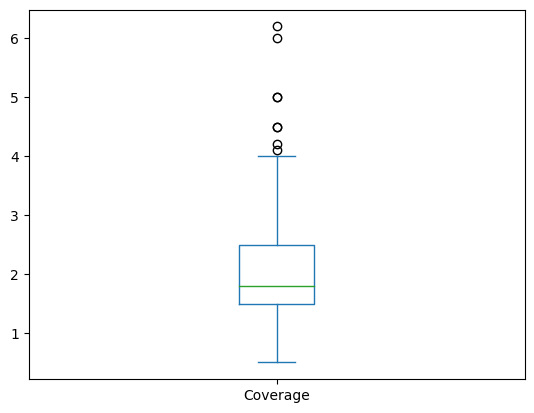

In [35]:
df.plot(kind='box')

In [36]:
df.query('Coverage>=2')

,TF_ChIP_Name,Coverage
2,BCL11A.rep1.ENCFF386RHK,2.1
7,CTCF.rep2.ENCFF022DJJ,2.0
8,EGR2.rep1.ENCFF678DCD,2.8
10,FEZF1.rep1.ENCFF461APF,4.1
11,GFI1B.rep1.ENCFF228MHV,2.0
...,...,...
173,ZSCAN21.rep1.ENCFF292DXV,2.4
174,ZSCAN23.rep1.ENCFF266STR,2.0
176,ZSCAN4.rep1.ENCFF568EYU,2.0
178,ZSCAN5C.rep1.ENCFF969KIY,2.6


In [37]:
len(sorted(df.query('Coverage>=3').TF_ChIP_Name.str.split('.').str[0].tolist()))

30

In [38]:
sorted(df.query('Coverage>=3').TF_ChIP_Name.str.split('.').str[0].tolist())

['FEZF1',
 'GLIS1',
 'MAZ',
 'OSR2',
 'PATZ1',
 'PRDM10',
 'PRDM6',
 'SP2',
 'SP3',
 'SP7',
 'WT1',
 'ZBTB11',
 'ZBTB17',
 'ZBTB20',
 'ZBTB48',
 'ZBTB8A',
 'ZEB2',
 'ZFP69B',
 'ZIC2',
 'ZNF189',
 'ZNF335',
 'ZNF341',
 'ZNF366',
 'ZNF394',
 'ZNF518A',
 'ZNF580',
 'ZNF600',
 'ZNF692',
 'ZNF76',
 'ZXDB']

In [41]:
# 去找这些protein的fasta (uniprot)
# 继续做align
# https://www.uniprot.org/align

# https://zhuanlan.zhihu.com/p/36598434
# https://www.ebi.ac.uk/Tools/msa/mview/

# see results: ../uniprotkb_seq/2023-08-23

##### 

## homer annotatePeaks for unassorted off-target

```bash
cd final_list_after_igv_check

table=2023-08-25_merged_final_list_after_classification_step11.csv

cat $table | sed 1d | grep Unassorted | grep ATP8 | awk -F ',' '{print $1"\t"$2"\t"$3}' > ${table}_only_unassorted_ATP8.bed
cat $table | sed 1d | grep Unassorted | grep JAK2 | awk -F ',' '{print $1"\t"$2"\t"$3}' > ${table}_only_unassorted_JAK2.bed
cat $table | sed 1d | grep Unassorted | grep SIRT6 | awk -F ',' '{print $1"\t"$2"\t"$3}' > ${table}_only_unassorted_SIRT6.bed
annotatePeaks.pl ${table}_only_unassorted_ATP8.bed hg38 -annStats ../annoResults/only_unassorted_ATP8.log
annotatePeaks.pl ${table}_only_unassorted_JAK2.bed hg38 -annStats ../annoResults/only_unassorted_JAK2.log
annotatePeaks.pl ${table}_only_unassorted_SIRT6.bed hg38 -annStats ../annoResults/only_unassorted_SIRT6.log

bioat table merge -input_fmt tsv -output_fmt csv --input_header True --output_header True \
        only_unassorted_ATP8.log,only_unassorted_JAK2.log,only_unassorted_SIRT6.log,DdCBE_IND4_5.1_6.homer_log  \
        unassorted_ATP8,unassorted_JAK2,unassorted_SIRT6,DdCBE_IND4_5.1_6 homer.annoResults.merge.csv
```

In [59]:
import pandas as pd

In [60]:
df = pd.read_csv('../annoResults/homer.annoResults.merge.csv')

filt = ['Promoter', '5UTR', '3UTR', 'Exon', 'Intron', 'TTS', 'Intergenic']

df = df[df['Total size (bp)'].str.isdecimal()].copy()
df.drop_duplicates(subset=['<sample>', 'Annotation'], keep='first', inplace=True)
df = df[df['Annotation'].map(lambda x: x in filt)].copy()
df.iloc[:, 2:] = df.iloc[:, 2:].astype(float)
df

,<sample>,Annotation,Number of peaks,Total size (bp),Log2 Ratio (obs/exp),LogP enrichment (+values depleted)
0,unassorted_ATP8,3UTR,10.0,26786192.0,0.555,-1.899
3,unassorted_ATP8,TTS,12.0,32227484.0,0.551,-2.079
5,unassorted_ATP8,Exon,6.0,37015031.0,-0.649,1.77
6,unassorted_ATP8,Intron,372.0,1253662019.0,0.223,-9.707
7,unassorted_ATP8,Intergenic,330.0,1631972721.0,-0.33,21.274
8,unassorted_ATP8,Promoter,35.0,35774823.0,1.944,-24.111
9,unassorted_ATP8,5UTR,4.0,2592085.0,2.602,-5.373
46,unassorted_JAK2,3UTR,5.0,26786192.0,0.676,-1.578
49,unassorted_JAK2,TTS,7.0,32227484.0,0.894,-2.446
51,unassorted_JAK2,Exon,5.0,37015031.0,0.209,-0.833


In [61]:
from lets_plot import *
from lets_plot.mapping import as_discrete

In [62]:
LetsPlot.setup_html()

In [63]:
(
    ggplot(data=df, mapping=aes(x=as_discrete("Annotation", order=-1), y="Log2 Ratio (obs/exp)", fill='<sample>'))
    + geom_bar(stat='identity', position='dodge', width=0.7)
    # + scale_x_discrete(labels=filt)
    + ggsize(1000, 550)
# + facet_grid(y='<sample>', scales='free')
# + scale_y_continuous(limits=(-2, 10))
)

##### 